# Librerias

In [ ]:
import torch
from torchvision.datasets import MNIST
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from torch import nn

# Downlaod MINST Dataset

In [ ]:
dataset = MNIST(root = '', download = True)

In [ ]:
type(dataset[0][1])

int

In [ ]:
len(dataset)

60000

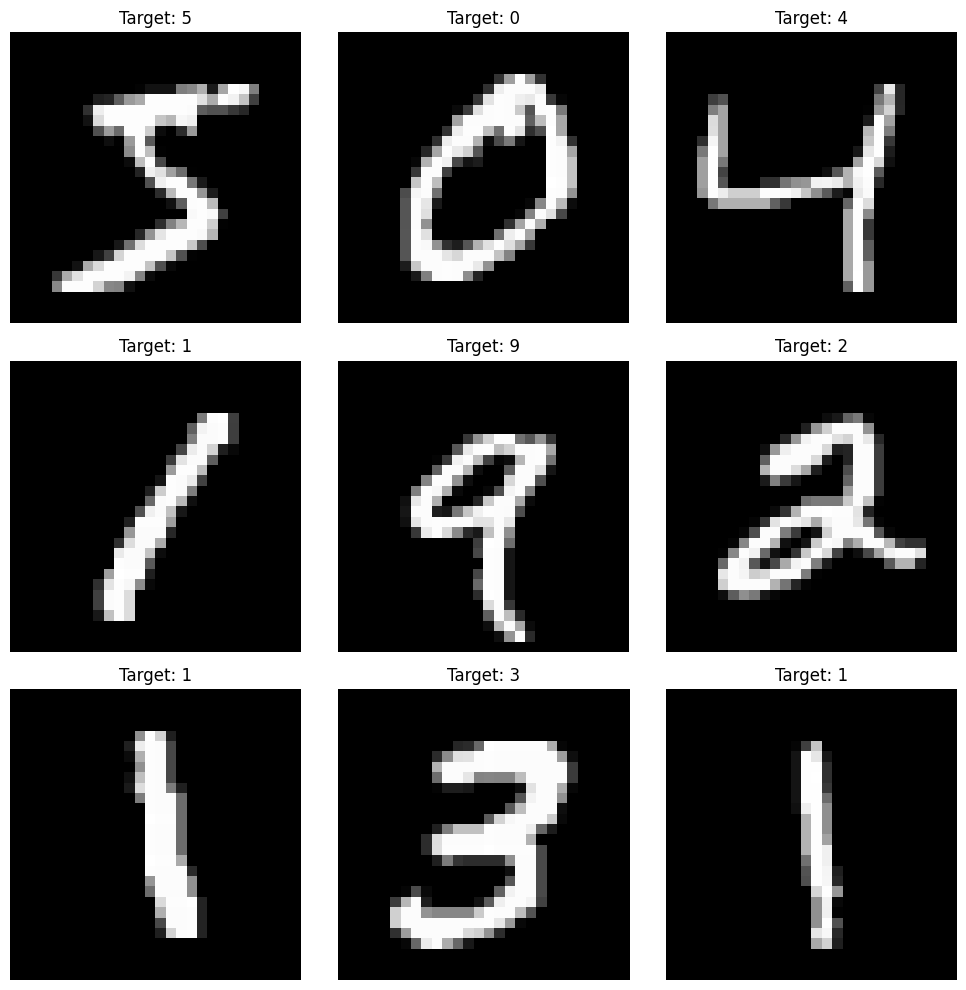

In [ ]:
import matplotlib.pyplot as plt
# Plotting
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.imshow(dataset[i][0], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Target: {dataset[i][1]}')

plt.tight_layout()
plt.show()

In [ ]:
dataset[0][0].size

(28, 28)

# I need:

- Build Generator Model
  - MLP
  - CNN
- Build Discriminator Model
 - MLP
 - CNN
- Write Train routine

# Generator

In [ ]:
from torch import nn
class Generator(nn.Module):
  def __init__(self, latent_size):
    super(Generator, self).__init__()

    self.linear_projection = nn.Linear(latent_size, 4*4*1024)

    self.upsampling = nn.Sequential(
        nn.ConvTranspose2d(1024, 512, 4, 2, 1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.ConvTranspose2d(512, 256, 4, 2, 1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.ConvTranspose2d(256, 1, 4, 2, 3),
        nn.Tanh()
    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, nn.Linear) or isinstance(layer, nn.ConvTranspose2d):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)

  def forward(self, x):
    x = self.linear_projection(x)
    x = x.view(-1, 1024, 4, 4)
    x = self.upsampling(x)
    return x


In [ ]:
2**5

32

In [ ]:
from torch import nn
class Generator(nn.Module):
  def __init__(self, latent_size):
    super(Generator, self).__init__()

    self.linear_projection = nn.Linear(latent_size, 4*4*32)

    self.upsampling = nn.Sequential(
        nn.ConvTranspose2d(32, 16, 4, 2, 1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 8, 4, 2, 1),
        nn.BatchNorm2d(8),
        nn.ReLU(),
        nn.ConvTranspose2d(8, 1, 4, 2, 3),
        nn.Tanh()
    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, nn.Linear) or isinstance(layer, nn.ConvTranspose2d):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)

  def forward(self, x):
    x = self.linear_projection(x)
    x = x.view(-1, 32, 4, 4)
    x = self.upsampling(x)
    return x


In [ ]:
from torch import nn
class Generator(nn.Module):
  def __init__(self, latent_size):
    # Igual que el paper
    super(Generator, self).__init__()

    self.linear_projection = nn.Linear(latent_size, 4*4*1024)

    self.upsampling = nn.Sequential(
        nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias = False),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.ConvTranspose2d(512, 256, 4, 2, 1, bias = False),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.ConvTranspose2d(256, 128, 4, 2, 1, bias = False),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.ConvTranspose2d(128, 1, 4, 2, 1, bias = False),
        nn.Tanh()
    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)

  def forward(self, x):
    x = self.linear_projection(x)
    x = x.view(-1, 1024, 4, 4)
    x = self.upsampling(x)
    return x


In [ ]:
class Generator(nn.Module):
    def __init__(self, channels_noise, channels_img = 1, features_g=64):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            # Input: N x channels_noise x 1 x 1
            self._block(channels_noise, features_g * 16, 4, 1, 0),  # img: 4x4
            self._block(features_g * 16, features_g * 8, 4, 2, 1),  # img: 8x8
            self._block(features_g * 8, features_g * 4, 4, 2, 1),  # img: 16x16
            self._block(features_g * 4, features_g * 2, 4, 2, 1),  # img: 32x32
            nn.ConvTranspose2d(
                features_g * 2, channels_img, kernel_size=4, stride=2, padding=1
            ),
            # Output: N x channels_img x 64 x 64
            nn.Tanh(),
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False,
            ),
            # nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
2**4

16

In [ ]:
from torch import nn
class Generator(nn.Module):
  def __init__(self, latent_size):
    super(Generator, self).__init__()

    self.linear_projection = nn.Linear(latent_size, 8*8*16)

    self.upsampling = nn.Sequential(
        nn.ConvTranspose2d(16, 8, 4, 2, 1),
        nn.BatchNorm2d(8),
        nn.LeakyReLU(0.2, inplace = True),
        nn.ConvTranspose2d(8, 1, 4, 2, 3),
        nn.Tanh()
    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)

  def forward(self, x):
    x = self.linear_projection(x)
    x = x.view(-1, 16, 8, 8)
    x = self.upsampling(x)
    return x


In [ ]:
from torch import nn
class Generator(nn.Module):
  def __init__(self, latent_size):
    super(Generator, self).__init__()

    self.linear_projection = nn.Linear(latent_size, 4*4*512)

    self.upsampling = nn.Sequential(
        #nn.ConvTranspose2d(100, 512, 4, 1, 0),
        #nn.BatchNorm2d(512),
        #nn.ReLU(inplace = True),
        nn.ConvTranspose2d(512, 256, 4, 2, 1),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace = True),
        nn.ConvTranspose2d(256, 128, 4, 2, 1),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace = True),
        nn.ConvTranspose2d(128, 64, 4, 2, 1),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace = True),
        nn.ConvTranspose2d(64, 1, 4, 2, 1),
        nn.Tanh()
    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)

  def forward(self, x):
    x = self.linear_projection(x)
    x = x.view(-1, 512, 4, 4)
    x = self.upsampling(x)
    return x


In [ ]:
G = Generator(100)

In [ ]:
noise = torch.randn(100, 1, 1)
noise.shape

torch.Size([100, 1, 1])

In [ ]:
G.eval()
x = G(noise.unsqueeze(0))

In [ ]:
x.shape

torch.Size([1, 1, 64, 64])

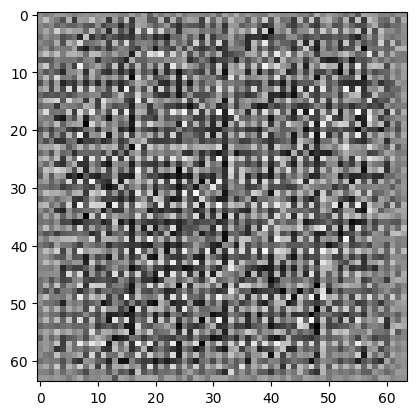

In [ ]:
plt.imshow(x.view(64,64).detach().numpy(), cmap='gray')

In [ ]:
x.shape

torch.Size([1, 1, 28, 28])

# Discriminator

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.model = nn.Sequential(
        nn.Conv2d(1, 16, 4, 2, 3),
        nn.LeakyReLU(0.2),
        nn.Conv2d(16, 32, 4, 2, 1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(0.2),
        nn.Conv2d(32, 64, 4, 2, 1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2),
        nn.Flatten(),
        nn.Linear(64*4*4, 1),
        nn.Sigmoid()

    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, nn.Linear) or isinstance(layer, nn.Conv2d):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)

  def forward(self, x):
    x = self.model(x)
    return x

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.model = nn.Sequential(
        nn.Conv2d(1, 8, 4, 2, 3),
        nn.LeakyReLU(0.2),
        nn.Conv2d(8, 16, 4, 2, 1),
        nn.BatchNorm2d(16),
        nn.LeakyReLU(0.2),
        nn.Conv2d(16, 32, 4, 2, 1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(0.2),
        nn.Flatten(),
        nn.Linear(32*4*4, 1),
        nn.Sigmoid()

    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)


  def forward(self, x):
    x = self.model(x)
    return x



In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    # Igual que el paper
    self.model = nn.Sequential(
        nn.Conv2d(1, 128, 4, 2, 1, bias = False),
        nn.LeakyReLU(0.2),
        nn.Conv2d(128, 256, 4, 2, 1, bias = False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2),
        nn.Conv2d(256, 512, 4, 2, 1, bias = False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2),
        nn.Conv2d(512, 1024, 4, 2, 1, bias = False),
        nn.BatchNorm2d(1024),
        nn.LeakyReLU(0.2),
        nn.Flatten(),
        nn.Linear(1024*4*4, 1),
        nn.Sigmoid()

    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)

  def forward(self, x):
    x = self.model(x)
    return x


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, channels_img=1, features_d=64):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            # input: N x channels_img x 64 x 64
            nn.Conv2d(channels_img, features_d, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            # _block(in_channels, out_channels, kernel_size, stride, padding)
            self._block(features_d, features_d * 2, 4, 2, 1),
            self._block(features_d * 2, features_d * 4, 4, 2, 1),
            self._block(features_d * 4, features_d * 8, 4, 2, 1),
            # After all _block img output is 4x4 (Conv2d below makes into 1x1)
            nn.Conv2d(features_d * 8, 1, kernel_size=4, stride=2, padding=0),
            nn.Sigmoid(),
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.Conv2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False,
            ),
            # nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
        )

    def forward(self, x):
        return self.disc(x)


In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.model = nn.Sequential(
        nn.Conv2d(1, 8, 4, 2, 3),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Conv2d(8, 16, 4, 2, 1),
        nn.BatchNorm2d(16),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Flatten(),
        nn.Linear(16*8*8, 1),
        nn.Sigmoid()

    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)


  def forward(self, x):
    x = self.model(x)
    return x



In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.model = nn.Sequential(
        nn.Conv2d(1, 64, 4, 2, 1),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Conv2d(64, 128, 4, 2, 1),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Conv2d(128, 256, 4, 2, 1),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Conv2d(256, 512, 4, 2, 1),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Flatten(),
        nn.Linear(512*4*4, 1),
        #nn.Conv2d(512, 1, 4, 1, 0),
        nn.Sigmoid()

    )


    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)


  def forward(self, x):
    x = self.model(x)
    return x



In [ ]:
D = Discriminator()

In [ ]:
y = D(x)

In [ ]:
y.reshape(-1)

tensor([0.9160], grad_fn=<ViewBackward0>)

In [ ]:
y.shape

torch.Size([1, 1, 1, 1])

# Data

In [ ]:
from torchvision.transforms import transforms

In [ ]:

transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),  # Convert PIL image or numpy array to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor with mean and standard deviation
])

In [ ]:
dataset = MNIST(root = '', download = True, transform =transform )

100%|██████████| 9912422/9912422 [00:00<00:00, 112482918.16it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 86095020.49it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 34012970.95it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18023206.02it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



## Noise Dataset

In [ ]:
from torch.utils.data import Dataset
class NoiseDataset(Dataset):
  def __init__(self, latent_size):
    self.latent_size = latent_size
  def __len__(self):
    return 60000
  def __getitem__(self, idx):
    return torch.randn(self.latent_size)

In [ ]:
n_dataset = NoiseDataset(100)
n_dataset

In [ ]:
from torch.utils.data import DataLoader, RandomSampler
#sampler = RandomSampler(dataset)
#n_sampler = RandomSampler(n_dataset)

#original_dl = DataLoader(dataset, batch_size = 64, sampler = sampler, pin_memory=torch.cuda.is_available())
#noise_dl = DataLoader(n_dataset, batch_size = 64, sampler = n_sampler, pin_memory=torch.cuda.is_available())

original_dl = DataLoader(dataset, batch_size = 64, shuffle = True, pin_memory=torch.cuda.is_available())
noise_dl = DataLoader(n_dataset, batch_size = 64, pin_memory=torch.cuda.is_available())

# Training

In [ ]:
G = Generator(100)
D = Discriminator()

In [ ]:
EPOCHS = 5
K = 1
BATCH_SIZE = 64
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
D_LOSS = nn.BCELoss()
G_LOSS = nn.BCELoss()

In [ ]:
d_optimizer = torch.optim.Adam(D.parameters(), lr = 0.0002, betas = (0.5, 0.999))
g_optimizer = torch.optim.Adam(G.parameters(), lr = 0.0002, betas = (0.5, 0.999))

In [ ]:
G.to(device)
D.to(device)

Discriminator(
  (model): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=8192, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

In [ ]:
G.train()
D.train()

Discriminator(
  (model): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=8192, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

In [ ]:
def initialize_weights(model):
    # Initializes weights according to the DCGAN paper
    for m in model.modules():
        if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            nn.init.normal_(m.weight.data, 0.0, 0.02)
initialize_weights(G)
initialize_weights(D)

NameError: name 'D' is not defined

In [ ]:
g_losses = []
d_losses = []

for epoch in tqdm(range(EPOCHS)):
  for k in range(K):
    # Discriminator Optimization
    x, _ = next(iter(original_dl)) # random batch
    #x, _ = batch
    x = x.to(device)
    #batch_size = x.size()[0]
    #x_b = x.view(batch_size, -1)
    d_optimizer.zero_grad()

    # models outputs
    #z = noise.repeat(batch_size, 1)
    #z = next(iter(noise_dl))
    z = torch.randn(100)
    z = z.to(device)
    G_z = G(z)
    D_x  = D(x).reshape(-1)
    D_G_z = D(G_z.detach()).reshape(-1)


    # tensor
    samples = torch.cat([D_G_z, D_x]).to(device)
    targets = torch.cat([torch.zeros(D_G_z.size()[0]), torch.ones(D_x.size()[0])]).to(device)
    # Generate a random permutation
    #permutation = torch.randperm(samples.size()[0])
    #samples = samples[permutation]
    #targets = targets[permutation]

    # loss
    d_loss = D_LOSS(samples, targets)
    d_loss.backward()

    # Adjust learning weights
    d_optimizer.step()

  # Generator Optimization
  g_optimizer.zero_grad()
  #z = next(iter(noise_dl)).to(device)
  #G_z = G(z)
  D_G_z = D(G_z).reshape(-1)
  targets = torch.ones(D_G_z.size()[0])
  #G_LOSS = nn.BCELoss(weight = torch.full((D_G_z.size()[0], 1), -1).to(device))
  g_loss = G_LOSS(D_G_z.to(device), targets.to(device))
  g_loss.backward()

  # Adjust learning weights
  g_optimizer.step()

  if epoch%100 == 0:
    print(f"Discriminator Loss Epoch {epoch}: {d_loss}")
    print(f"Generator Loss Epoch {epoch}: {g_loss}")
    torch.save(G.state_dict(), f"checkpoint_{epoch}.pt")
    #G.eval()
    #fig = plt.Figure(figsize=(10, 10))
    #plt.imshow(G(fix_sample.unsqueeze(0).to(device)).to("cpu").view(IMG_SIZE, IMG_SIZE).detach().numpy(), cmap='gray')
    #plt.show()
    #G.train()



  g_losses.append(g_loss.item())
  d_losses.append(d_loss.item())









  0%|          | 0/4690 [00:00<?, ?it/s]

Discriminator Loss Epoch 0: 0.6918327808380127
Generator Loss Epoch 0: 0.6936643123626709
Discriminator Loss Epoch 100: 0.03757784888148308
Generator Loss Epoch 100: 0.2056102454662323
Discriminator Loss Epoch 200: 0.031448058784008026
Generator Loss Epoch 200: 0.3286706805229187
Discriminator Loss Epoch 300: 0.004666534718126059
Generator Loss Epoch 300: 2.298351526260376
Discriminator Loss Epoch 400: 0.003322489792481065
Generator Loss Epoch 400: 2.2109720706939697
Discriminator Loss Epoch 500: 0.0015004989691078663
Generator Loss Epoch 500: 3.118748664855957
Discriminator Loss Epoch 600: 0.008979477919638157
Generator Loss Epoch 600: 2.4168338775634766
Discriminator Loss Epoch 700: 0.010413535870611668
Generator Loss Epoch 700: 1.7774739265441895
Discriminator Loss Epoch 800: 0.028636939823627472
Generator Loss Epoch 800: 2.4662222862243652
Discriminator Loss Epoch 900: 0.0020190991926938295
Generator Loss Epoch 900: 4.788665294647217
Discriminator Loss Epoch 1000: 0.002880680141970

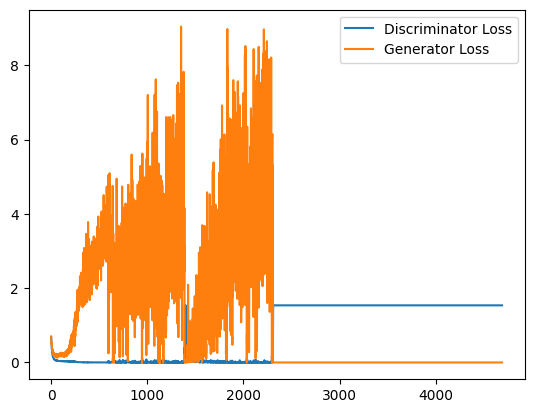

In [ ]:
plt.plot(range(EPOCHS), d_losses)
plt.plot(range(EPOCHS), g_losses)
plt.legend(['Discriminator Loss', 'Generator Loss'])

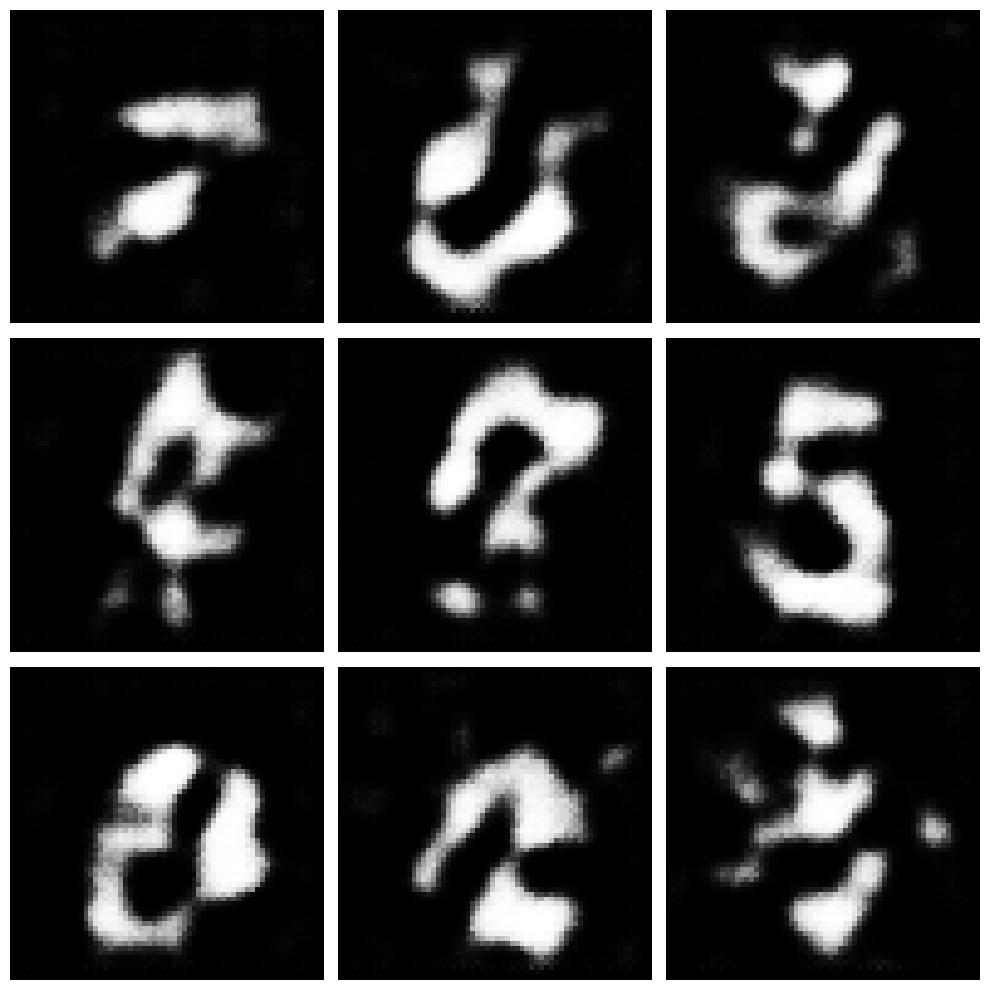

In [ ]:
G.eval()
IMG_SIZE = 64
import matplotlib.pyplot as plt
# Plotting
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.imshow(G(torch.randn(100).unsqueeze(0).to(device)).to("cpu").view(IMG_SIZE, IMG_SIZE).detach().numpy(), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Metodo 2

In [ ]:
g_losses = []
d_losses = []

for epoch in tqdm(range(EPOCHS)):
  for i, batch in enumerate(original_dl):

    # Discriminator Optimization
    #x, _ = next(iter(original_dl)) # random batch
    x, _ = batch
    x = x.to(device)
    batch_size = x.size()[0]
    #x_b = x.view(batch_size, -1)
    d_optimizer.zero_grad()

    # models outputs
    #z = noise.repeat(batch_size, 1)
    z = torch.randn(batch_size,100)#next(iter(noise_dl))
    z = z.to(device)
    G_z = G(z)
    D_x  = D(x).reshape(-1)
    D_G_z = D(G_z.detach()).reshape(-1)


    # tensor
    samples = torch.cat([D_G_z, D_x]).to(device)
    targets = torch.cat([torch.zeros(D_G_z.size()[0]), torch.ones(D_x.size()[0])]).to(device)
    # Generate a random permutation
    #permutation = torch.randperm(samples.size()[0])
    #samples = samples[permutation]
    #targets = targets[permutation]

    # loss
    d_loss = D_LOSS(samples, targets)
    d_loss.backward()

    # Adjust learning weights
    d_optimizer.step()

    # Generator Optimization
    g_optimizer.zero_grad()
    #z = next(iter(noise_dl)).to(device)
    #G_z = G(z)
    D_G_z = D(G_z).reshape(-1)
    targets = torch.ones(D_G_z.size()[0])
    #G_LOSS = nn.BCELoss(weight = torch.full((D_G_z.size()[0], 1), -1).to(device))
    g_loss = G_LOSS(D_G_z.to(device), targets.to(device))
    g_loss.backward()

    # Adjust learning weights
    g_optimizer.step()

    print(f"Discriminator Loss ({epoch}/{EPOCHS}) Step {i}: {d_loss}")
    print(f"Generator Loss ({epoch}/{EPOCHS}) Step {i}: {g_loss}")

  if epoch%1 == 0:
    print(f"Discriminator Loss Epoch {epoch}: {d_loss}")
    print(f"Generator Loss Epoch {epoch}: {g_loss}")
    torch.save(G.state_dict(), f"checkpoint_{epoch}.pt")
    #G.eval()
    #fig = plt.Figure(figsize=(10, 10))
    #plt.imshow(G(fix_sample.unsqueeze(0).to(device)).to("cpu").view(IMG_SIZE, IMG_SIZE).detach().numpy(), cmap='gray')
    #plt.show()
    #G.train()



  g_losses.append(g_loss.item())
  d_losses.append(d_loss.item())









  0%|          | 0/5 [00:00<?, ?it/s]

Se han truncado las últimas 5000 líneas del flujo de salida.
Discriminator Loss (2/5) Step 317: 0.07347703725099564
Generator Loss (2/5) Step 317: 2.977376937866211
Discriminator Loss (2/5) Step 318: 0.07996141910552979
Generator Loss (2/5) Step 318: 3.1558926105499268
Discriminator Loss (2/5) Step 319: 0.07507836073637009
Generator Loss (2/5) Step 319: 3.300844192504883
Discriminator Loss (2/5) Step 320: 0.07425068318843842
Generator Loss (2/5) Step 320: 2.9956436157226562
Discriminator Loss (2/5) Step 321: 0.0781589150428772
Generator Loss (2/5) Step 321: 3.0511813163757324
Discriminator Loss (2/5) Step 322: 0.07616350054740906
Generator Loss (2/5) Step 322: 3.5840768814086914
Discriminator Loss (2/5) Step 323: 0.09189341962337494
Generator Loss (2/5) Step 323: 3.048044204711914
Discriminator Loss (2/5) Step 324: 0.08816573768854141
Generator Loss (2/5) Step 324: 2.9331843852996826
Discriminator Loss (2/5) Step 325: 0.09708184003829956
Generator Loss (2/5) Step 325: 3.604661703109741

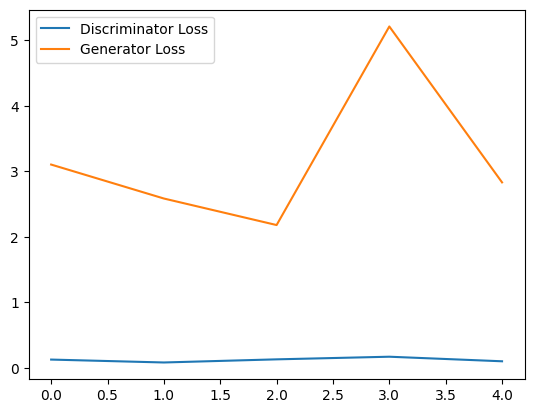

In [ ]:
plt.plot(range(EPOCHS), d_losses)
plt.plot(range(EPOCHS), g_losses)
plt.legend(['Discriminator Loss', 'Generator Loss'])

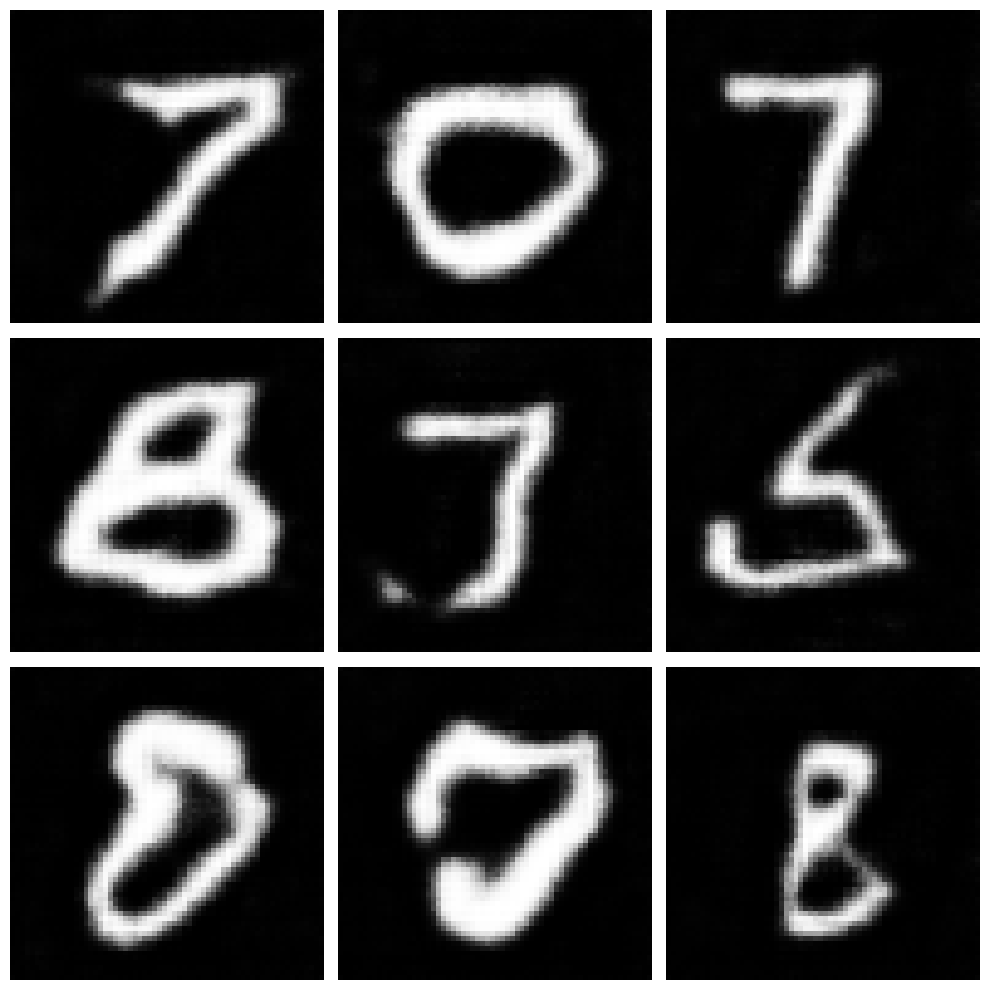

In [ ]:
G.eval()
IMG_SIZE = 64
import matplotlib.pyplot as plt
# Plotting
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.imshow(G(n_dataset[i].unsqueeze(0).to(device)).to("cpu").view(IMG_SIZE, IMG_SIZE).detach().numpy(), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import glob
checkpoints = glob.glob("*.pt")
def sort_key(checkpoint):
    return int(checkpoint.split('_')[1].split('.')[0])
# Sort the checkpoint list using the custom sorting function
sorted_checkpoints = sorted(checkpoints, key=sort_key)
sorted_checkpoints

['checkpoint_0.pt',
 'checkpoint_1.pt',
 'checkpoint_2.pt',
 'checkpoint_3.pt',
 'checkpoint_4.pt']

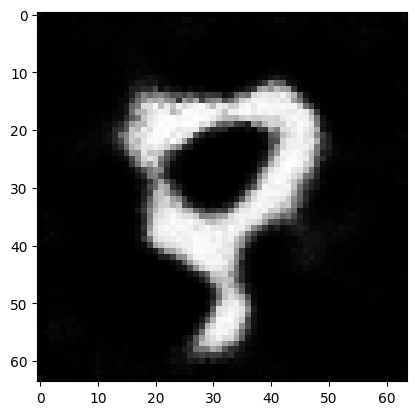

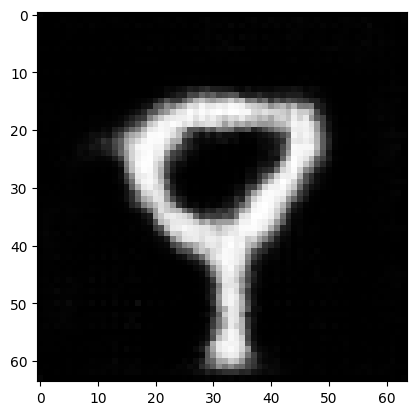

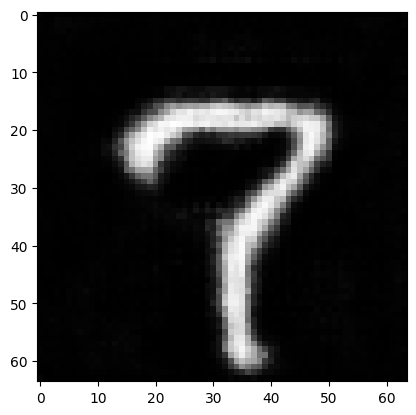

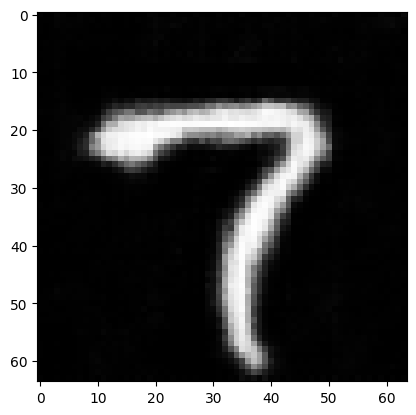

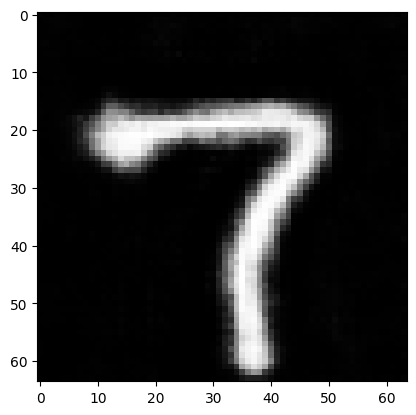

In [ ]:
fix_sample = n_dataset[0]
for cp in sorted_checkpoints:
  model = Generator(100)
  model.load_state_dict(torch.load(cp))
  model.eval()
  img = model(fix_sample.unsqueeze(0))
  plt.imshow(img.view(IMG_SIZE, IMG_SIZE).detach().numpy(), cmap = 'gray')
  ax.axis('off')
  plt.show()

# Celeb Dataset

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
CHANNELS_IMG = 3

In [ ]:
transforms = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.5 for _ in range(CHANNELS_IMG)], [0.5 for _ in range(CHANNELS_IMG)]
        ),
    ])

In [ ]:
dataset = datasets.ImageFolder(root="/content/drive/MyDrive/Colab Data/celeb_dataset", transform=transforms)
original_dl = DataLoader(dataset, batch_size=64, shuffle=True)

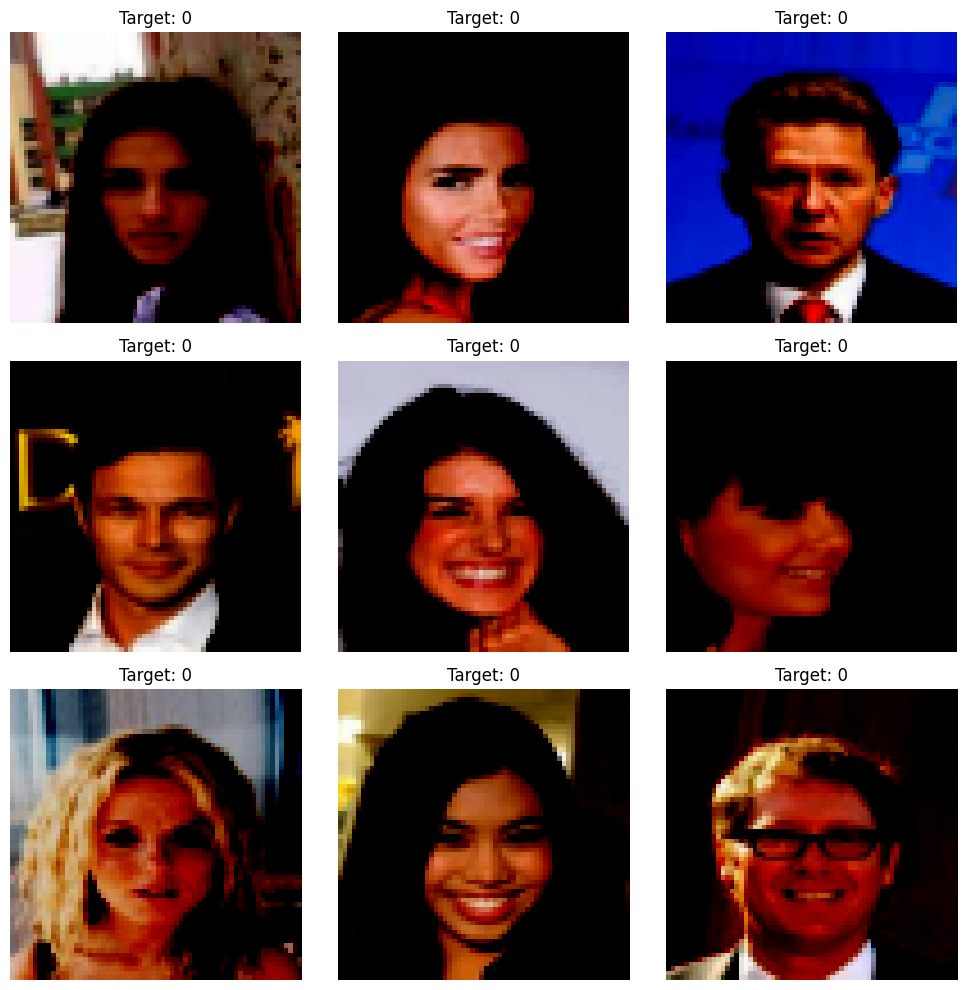

In [ ]:
import matplotlib.pyplot as plt
# Plotting
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.imshow(torch.permute(dataset[i][0], (1, 2, 0)))
    ax.axis('off')
    ax.set_title(f'Target: {dataset[i][1]}')

plt.tight_layout()
plt.show()

## Models

In [ ]:
from torch import nn
class Generator(nn.Module):
  def __init__(self, latent_size):
    super(Generator, self).__init__()

    self.linear_projection = nn.Linear(latent_size, 4*4*512)

    self.upsampling = nn.Sequential(
        #nn.ConvTranspose2d(100, 512, 4, 1, 0),
        #nn.BatchNorm2d(512),
        #nn.ReLU(inplace = True),
        nn.ConvTranspose2d(512, 256, 4, 2, 1),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace = True),
        nn.ConvTranspose2d(256, 128, 4, 2, 1),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace = True),
        nn.ConvTranspose2d(128, 64, 4, 2, 1),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace = True),
        nn.ConvTranspose2d(64, 3, 4, 2, 1),
        nn.Tanh()
    )

    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)

  def forward(self, x):
    x = self.linear_projection(x)
    x = x.view(-1, 512, 4, 4)
    x = self.upsampling(x)
    return x


In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.model = nn.Sequential(
        nn.Conv2d(3, 64, 4, 2, 1),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Conv2d(64, 128, 4, 2, 1),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Conv2d(128, 256, 4, 2, 1),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Conv2d(256, 512, 4, 2, 1),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Flatten(),
        nn.Linear(512*4*4, 1),
        #nn.Conv2d(512, 1, 4, 1, 0),
        nn.Sigmoid()

    )


    self.init_weights()

  def init_weights(self):
    for layer in self.modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            # Mean and standard deviation for the normal distribution
            mean, std = 0.0, 0.2

            # Initialize the weights with a normal distribution
            nn.init.normal_(layer.weight, mean=mean, std=std)


  def forward(self, x):
    x = self.model(x)
    return x



# Training

In [ ]:
G = Generator(100)
D = Discriminator()

In [ ]:
EPOCHS = 20
K = 1
BATCH_SIZE = 64
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
D_LOSS = nn.BCELoss()
G_LOSS = nn.BCELoss()

In [ ]:
d_optimizer = torch.optim.Adam(D.parameters(), lr = 0.0002, betas = (0.5, 0.999))
g_optimizer = torch.optim.Adam(G.parameters(), lr = 0.0002, betas = (0.5, 0.999))

In [ ]:
G.to(device)
D.to(device)

Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=8192, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

In [ ]:
G.train()
D.train()

Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=8192, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

In [ ]:
g_losses = []
d_losses = []

for epoch in tqdm(range(EPOCHS)):
  for i, batch in enumerate(original_dl):

    # Discriminator Optimization
    #x, _ = next(iter(original_dl)) # random batch
    x, _ = batch
    x = x.to(device)
    batch_size = x.size()[0]
    #x_b = x.view(batch_size, -1)
    d_optimizer.zero_grad()

    # models outputs
    #z = noise.repeat(batch_size, 1)
    z = torch.randn(batch_size,100)#next(iter(noise_dl))
    z = z.to(device)
    G_z = G(z)
    D_x  = D(x).reshape(-1)
    D_G_z = D(G_z.detach()).reshape(-1)


    # tensor
    samples = torch.cat([D_G_z, D_x]).to(device)
    targets = torch.cat([torch.zeros(D_G_z.size()[0]), torch.ones(D_x.size()[0])]).to(device)
    # Generate a random permutation
    #permutation = torch.randperm(samples.size()[0])
    #samples = samples[permutation]
    #targets = targets[permutation]

    # loss
    d_loss = D_LOSS(samples, targets)
    d_loss.backward()

    # Adjust learning weights
    d_optimizer.step()

    # Generator Optimization
    g_optimizer.zero_grad()
    #z = next(iter(noise_dl)).to(device)
    #G_z = G(z)
    D_G_z = D(G_z).reshape(-1)
    targets = torch.ones(D_G_z.size()[0])
    #G_LOSS = nn.BCELoss(weight = torch.full((D_G_z.size()[0], 1), -1).to(device))
    g_loss = G_LOSS(D_G_z.to(device), targets.to(device))
    g_loss.backward()

    # Adjust learning weights
    g_optimizer.step()

    print(f"Discriminator Loss ({epoch}/{EPOCHS}) Step {i}: {d_loss}")
    print(f"Generator Loss ({epoch}/{EPOCHS}) Step {i}: {g_loss}")

  if epoch%1 == 0:
    print(f"Discriminator Loss Epoch {epoch}: {d_loss}")
    print(f"Generator Loss Epoch {epoch}: {g_loss}")
    torch.save(G.state_dict(), f"checkpoint_{epoch}.pt")
    #G.eval()
    #fig = plt.Figure(figsize=(10, 10))
    #plt.imshow(G(fix_sample.unsqueeze(0).to(device)).to("cpu").view(IMG_SIZE, IMG_SIZE).detach().numpy(), cmap='gray')
    #plt.show()
    #G.train()



  g_losses.append(g_loss.item())
  d_losses.append(d_loss.item())









  0%|          | 0/20 [00:00<?, ?it/s]

Se han truncado las últimas 5000 líneas del flujo de salida.
Discriminator Loss (10/20) Step 140: 0.2978575825691223
Generator Loss (10/20) Step 140: 1.8570395708084106
Discriminator Loss (10/20) Step 141: 0.34089070558547974
Generator Loss (10/20) Step 141: 1.1333060264587402
Discriminator Loss (10/20) Step 142: 0.45068228244781494
Generator Loss (10/20) Step 142: 2.297776699066162
Discriminator Loss (10/20) Step 143: 0.32371002435684204
Generator Loss (10/20) Step 143: 2.0644338130950928
Discriminator Loss (10/20) Step 144: 0.27057021856307983
Generator Loss (10/20) Step 144: 1.6898494958877563
Discriminator Loss (10/20) Step 145: 0.2505573034286499
Generator Loss (10/20) Step 145: 1.913496494293213
Discriminator Loss (10/20) Step 146: 0.34966158866882324
Generator Loss (10/20) Step 146: 1.8885942697525024
Discriminator Loss (10/20) Step 147: 0.2411482036113739
Generator Loss (10/20) Step 147: 2.381432056427002
Discriminator Loss (10/20) Step 148: 0.3399610221385956
Generator Loss (1

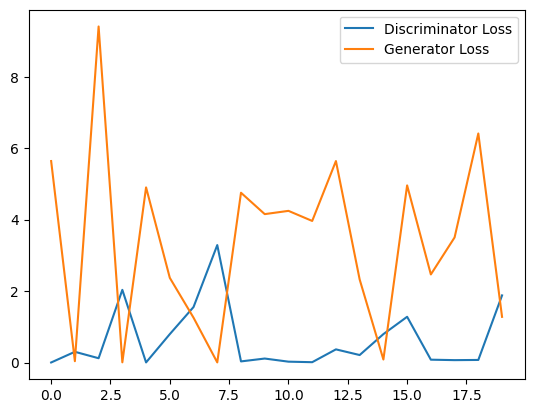

In [ ]:
plt.plot(range(EPOCHS), d_losses)
plt.plot(range(EPOCHS), g_losses)
plt.legend(['Discriminator Loss', 'Generator Loss'])

In [ ]:
G(n_dataset[i].unsqueeze(0).to(device)).to("cpu").squeeze(0).permute([1,2,0]).shape

torch.Size([64, 64, 3])

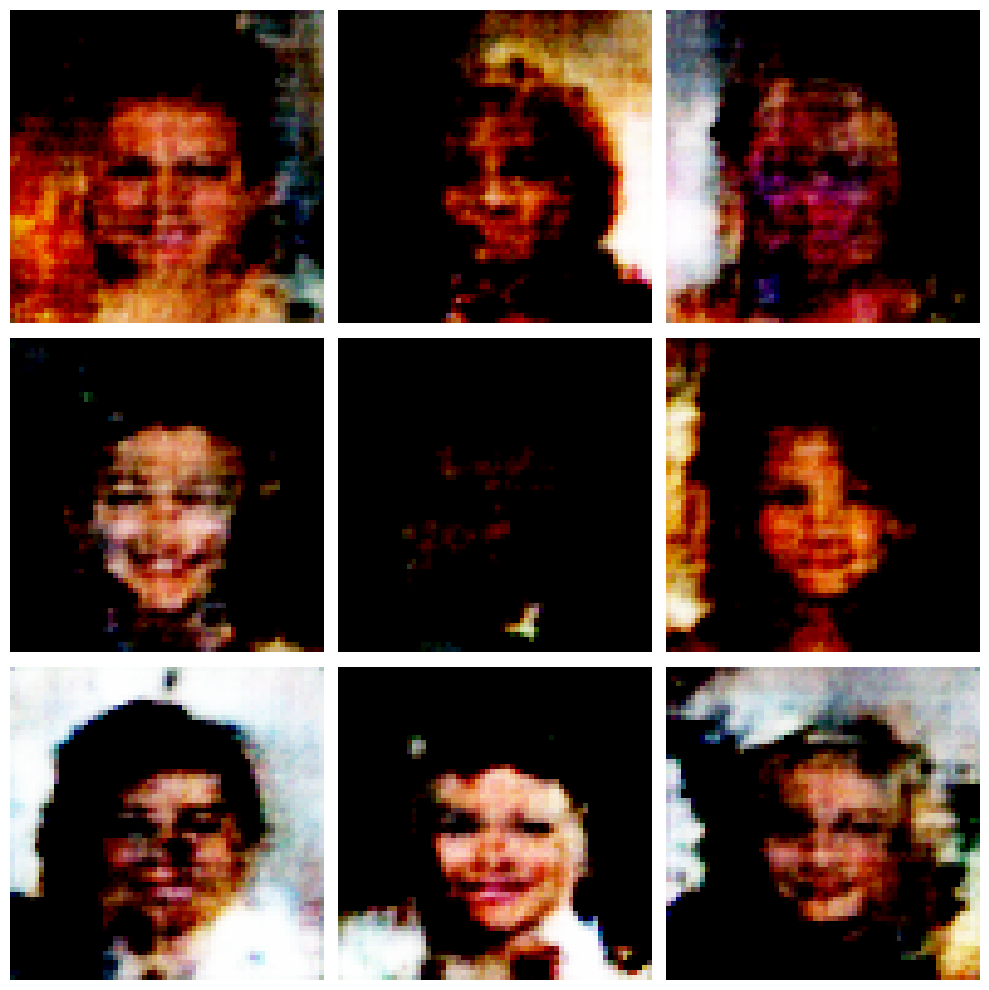

In [ ]:
G.eval()
IMG_SIZE = 64
import matplotlib.pyplot as plt
# Plotting
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.imshow(G(n_dataset[i].unsqueeze(0).to(device)).to("cpu").squeeze(0).permute([1,2,0]).detach().numpy())
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import glob
checkpoints = glob.glob("*.pt")
def sort_key(checkpoint):
    return int(checkpoint.split('_')[1].split('.')[0])
# Sort the checkpoint list using the custom sorting function
sorted_checkpoints = sorted(checkpoints, key=sort_key)
sorted_checkpoints

['checkpoint_0.pt',
 'checkpoint_1.pt',
 'checkpoint_2.pt',
 'checkpoint_3.pt',
 'checkpoint_4.pt',
 'checkpoint_5.pt',
 'checkpoint_6.pt',
 'checkpoint_7.pt',
 'checkpoint_8.pt',
 'checkpoint_9.pt',
 'checkpoint_10.pt',
 'checkpoint_11.pt',
 'checkpoint_12.pt',
 'checkpoint_13.pt',
 'checkpoint_14.pt',
 'checkpoint_15.pt',
 'checkpoint_16.pt',
 'checkpoint_17.pt',
 'checkpoint_18.pt',
 'checkpoint_19.pt']

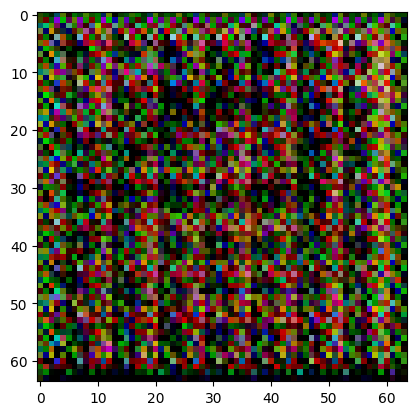

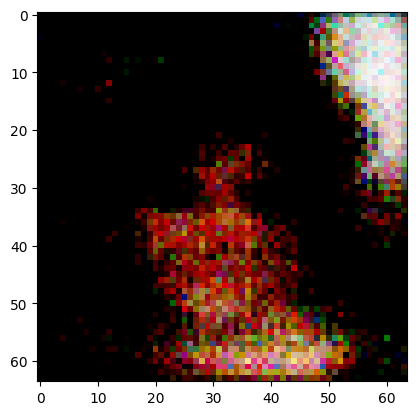

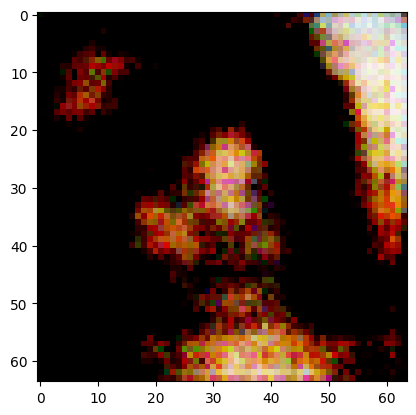

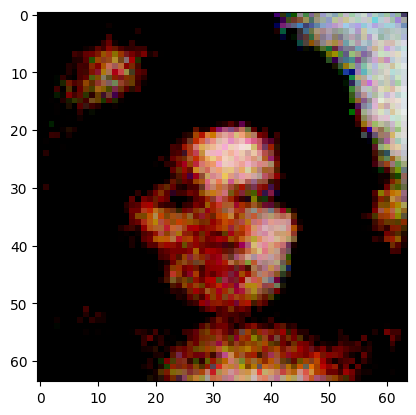

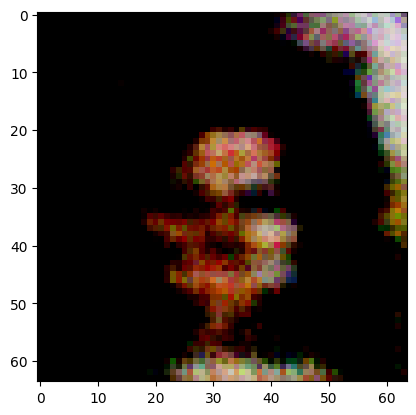

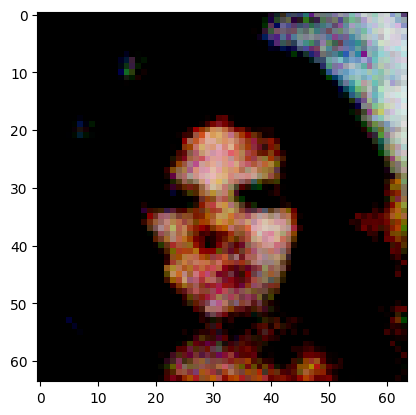

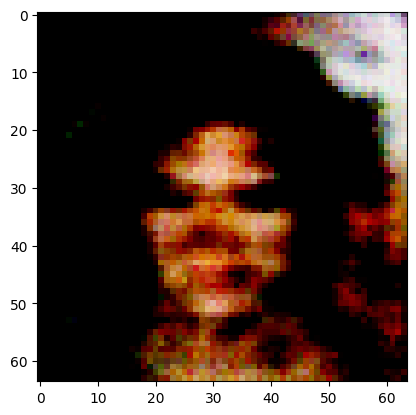

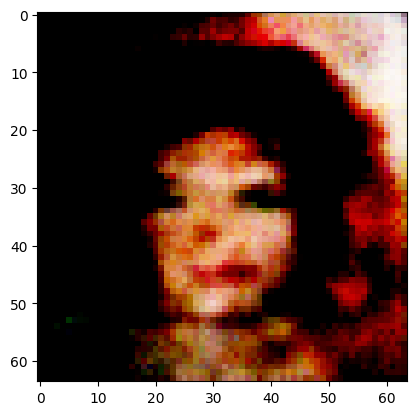

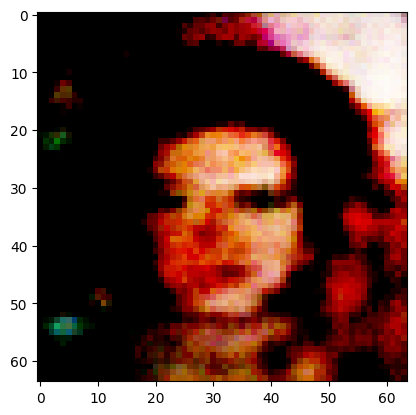

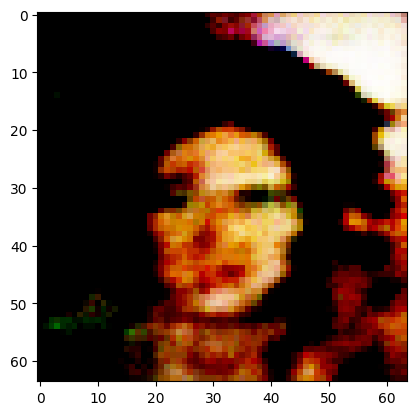

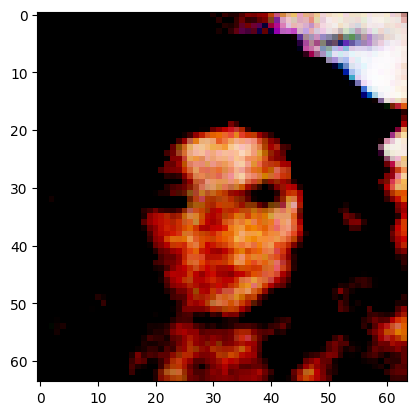

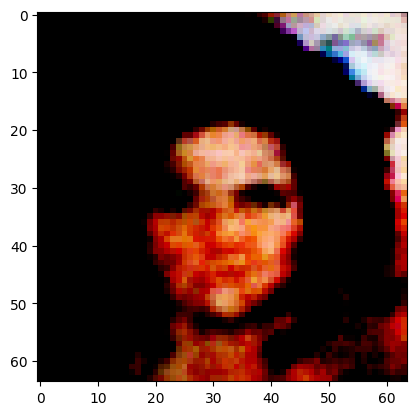

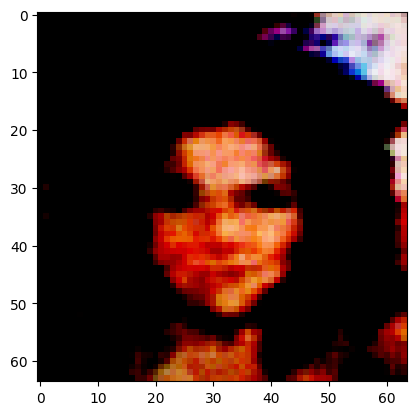

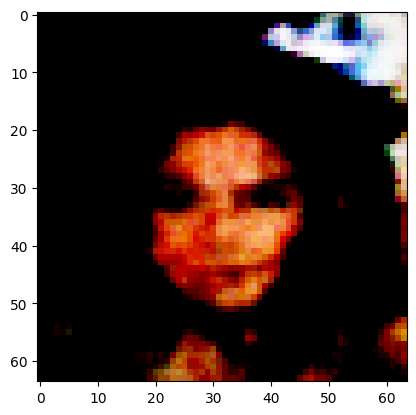

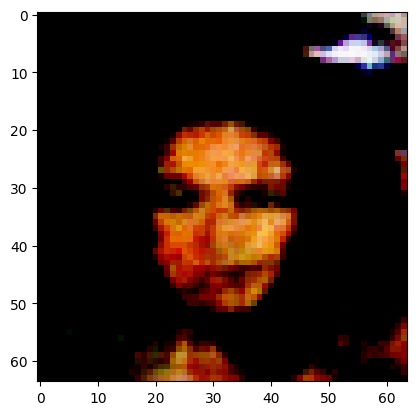

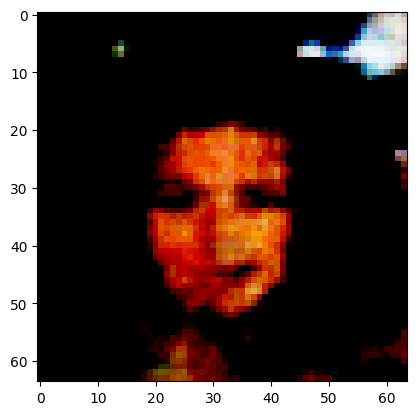

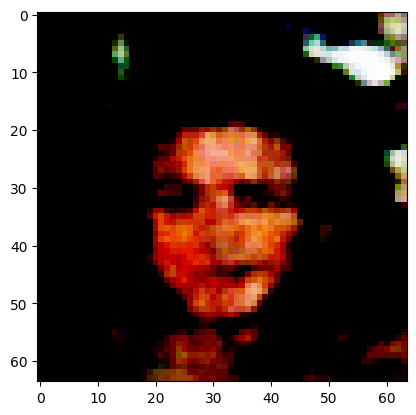

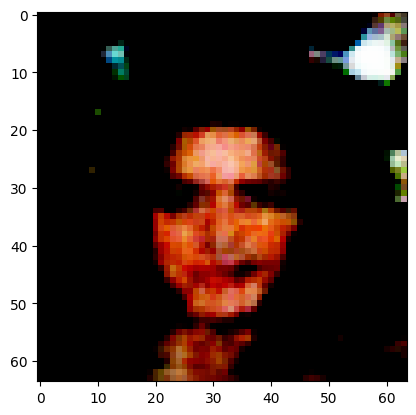

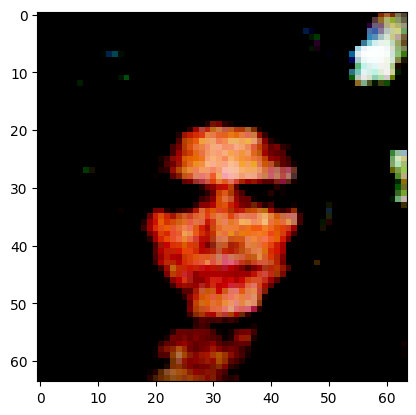

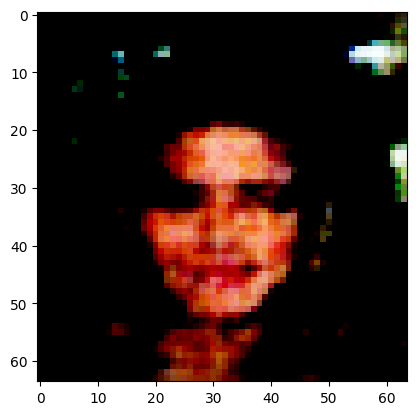

In [ ]:
fix_sample = n_dataset[0]
for cp in sorted_checkpoints:
  model = Generator(100)
  model.load_state_dict(torch.load(cp))
  model.eval()
  img = model(fix_sample.unsqueeze(0)).to(device).to("cpu")
  plt.imshow(img.squeeze(0).permute([1,2,0]).detach().numpy())
  ax.axis('off')
  plt.show()